In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('seaborn')
import pandas as pd
import numpy as np

params = {
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'axes.labelsize':12,
    'legend.fontsize':8,
    'font.family':'Times New Roman',
    'font.weight':'normal',
}
rcParams.update(params)

width = 4.963
height = width * .75

In [5]:
data = pd.read_csv('../data/result.csv')

In [6]:
data

,IRAS,RA1950,DE1950,Fnu_12,e_Fnu_12,Fnu_25,e_Fnu_25,Fnu_60,e_Fnu_60,Fnu_100,e_Fnu_100
0,02174+6052,34.358333,60.871389,0.8799,6,2.3630,6,32.010,0,127.90,0
1,02156+6045,33.915417,60.766111,0.2729,0,0.3631,13,3.601,18,44.14,0
2,02157+6053,33.928333,60.891111,0.8217,16,1.3090,13,21.800,16,215.10,0
3,02168+6052,34.211250,60.870000,2.1570,24,2.1790,22,32.010,0,127.90,14
4,02165+6053,34.137500,60.891389,0.3451,25,1.7190,15,1.850,0,215.10,0
5,02171+6058,34.286250,60.971667,0.3587,15,1.8400,6,11.610,10,63.52,17
6,02160+6057,34.021250,60.960556,2.4030,16,2.9900,20,47.370,20,215.10,16


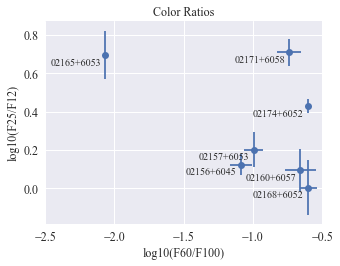

In [23]:
x = np.log10(data['Fnu_60'] / data['Fnu_100'])
y = np.log10(data['Fnu_25'] / data['Fnu_12'])
xerr = 1/(100 * np.log(10)) * np.sqrt(data['e_Fnu_60']**2 + data['e_Fnu_100']**2)
yerr = 1/(100 * np.log(10)) * np.sqrt(data['e_Fnu_25']**2 + data['e_Fnu_12']**2)


plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o')
[plt.annotate(data['IRAS'][i], r, xytext=(-55, -10), textcoords='offset points') for i, r in enumerate(zip(x, y))]
plt.title('Color Ratios')
plt.ylabel('log10(F25/F12)')
plt.xlabel('log10(F60/F100)')
plt.xlim(-2.5, -.5)
plt.gcf().set_size_inches(width, height)
plt.savefig('../docs/figs/colors.pdf')

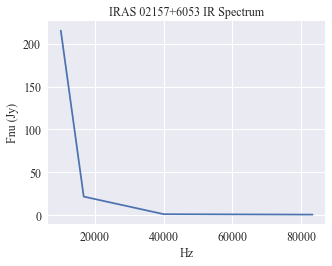

In [24]:
obj = data[data.IRAS == '02157+6053']
waves = np.array([12, 25, 60, 100])
freqs =  1 / (waves * 1e-6)
y = obj[['Fnu_12', 'Fnu_25', 'Fnu_60', 'Fnu_100']].values
yerr = obj[['e_Fnu_12', 'e_Fnu_25', 'e_Fnu_60', 'e_Fnu_100']].values * y / 100

plt.plot(freqs, y.flatten())
plt.title('IRAS 02157+6053 IR Spectrum')
plt.ylabel('Fnu (Jy)')
plt.xlabel('Hz')
plt.gcf().set_size_inches(width, height)
plt.savefig('../docs/figs/spectrum.pdf')

In [25]:
from scipy.integrate import simps
F_T = simps(y.flatten(), freqs)
L = F_T * 4 * np.pi * (2300*3.086e16 )**2 * 1e-26 
L / 3.846e26

1.9486714856837283e-08

In [28]:
tmass = pd.read_csv('../data/2mass.csv')
tmass.fillna(0)

,RAJ2000,DEJ2000,2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag
0,34.936,61.102,02194455+6106074,16.705,0.158,15.668,0.155,15.259,0.164
1,34.927,61.121,02194253+6107157,17.366,0.250,15.467,0.105,14.953,0.134
2,34.920,61.118,02194085+6107054,17.213,0.208,16.010,0.209,15.628,0.219
3,34.919,61.110,02194066+6106358,16.852,0.156,15.925,0.165,15.366,0.183
4,34.932,61.102,02194373+6106079,16.491,0.135,15.808,0.159,15.391,0.178
5,34.988,61.120,02195703+6107109,16.683,0.154,15.771,0.149,15.124,0.137
6,34.990,61.067,02195755+6104024,16.972,0.189,15.851,0.158,15.204,0.149
7,34.968,61.123,02195232+6107233,16.235,0.094,14.910,0.062,14.165,0.068
8,34.990,61.120,02195770+6107105,14.803,0.052,13.985,0.046,13.646,0.045
9,34.992,61.121,02195805+6107164,15.251,0.042,13.920,0.054,13.348,0.046


In [29]:
intrin = pd.read_csv('../data/intrinsic.csv')
intrin['J-H'] = intrin['J-K'] - intrin['H-K']

1.037 0.319


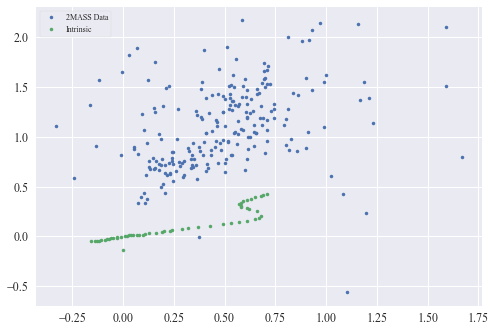

In [30]:
y = tmass['Jmag'] - tmass['Hmag']
x = tmass['Hmag'] - tmass['Kmag']
yerr = tmass['e_Jmag'] + tmass['e_Hmag']
xerr = tmass['e_Hmag'] + tmass['e_Kmag']
print(y[0], xerr[0])
plt.plot(x, y, '.', label='2MASS Data')
plt.plot(intrin['J-H'], intrin['H-K'], '.', label='Intrinsic')
plt.legend(frameon=True)

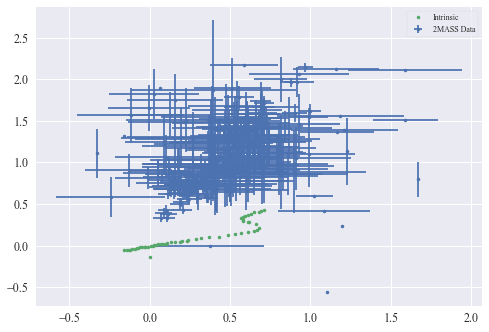

In [32]:
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='.' ,label='2MASS Data')
plt.plot(intrin['J-H'], intrin['H-K'], '.', label='Intrinsic')
plt.legend(frameon=True)